In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Show first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for null values
print("Missing values in each column:\n", df.isnull().sum())

# Display data types and structure
print("\nDataset info:")
df.info()


Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
from sklearn.preprocessing import StandardScaler

# Keep only numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


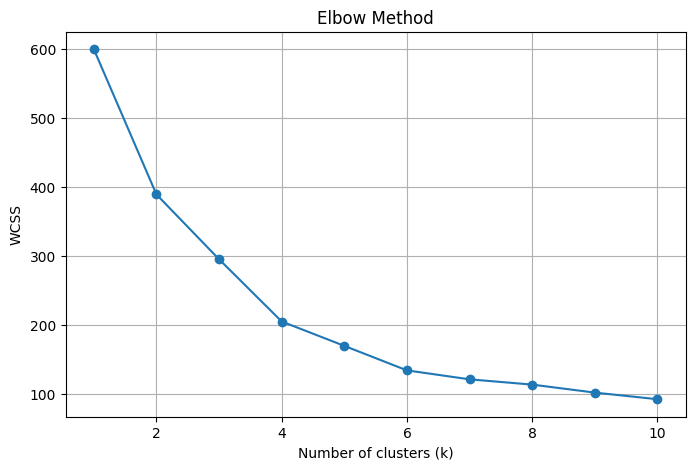

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k (number of clusters)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [7]:
# Apply KMeans with optimal k (from elbow method, assume k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Show first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


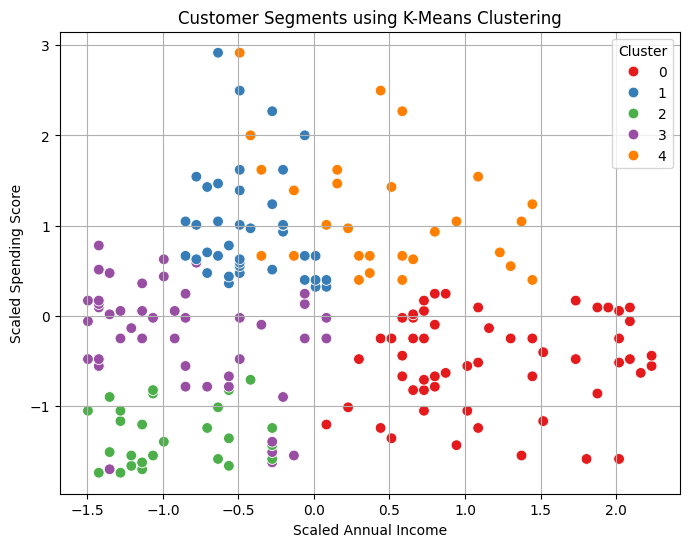

In [8]:
# 2D plot of clusters using Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1', s=60)
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
